# Frequency of Selected Keys

In [1]:
import pandas as pd
import numpy as np
import requests
import xmltodict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#load financial data

#path = r'/Users/annabramslow/Documents/Company2Vec/Data/financials.csv'
main_path = r'/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/Tables/Financials'

#read all files in the folder
import os
files = os.listdir(main_path)
dfs = []
for file in files:
    if '.csv' not in file:
        continue
    path = main_path + '/' + file
    df = pd.read_csv(path, index_col=0)
    dfs.append(df)

#concatenate all dataframes
df = pd.concat(dfs, axis=0)

In [3]:
#selected keys
selected_keys = ['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries', 'ProfitLoss', 'OtherFinanceIncome','OtherFinanceExpenses',
                 'NonCurrentAssets','CurrentAssets','CashAndCashEquivalents','Assets', 'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
                 'LongtermLiabilitiesOtherThanProvisions','ShorttermDebtToBanks','LiabilitiesOtherThanProvisions','LiabilitiesAndEquity']

In [4]:
#find columns name from 6th column onwards
columns = df.columns[5:]
columns

Index(['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries',
       'ProfitLoss', 'OtherFinanceIncome', 'OtherFinanceExpenses',
       'NonCurrentAssets', 'CurrentAssets', 'CashAndCashEquivalents', 'Assets',
       'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
       'LongtermLiabilitiesOtherThanProvisions', 'ShorttermDebtToBanks',
       'LiabilitiesOtherThanProvisions', 'LiabilitiesAndEquity'],
      dtype='object')

In [5]:
#check that selected keys are equal to the columns
columns == selected_keys

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [61]:
#find types of currencies
df['Currency'].value_counts()

DKK    2515819
EUR      10958
USD       3895
SEK        195
GBP        126
NOK         29
CHF         19
Name: Currency, dtype: int64

In [64]:
df['Currency'].isna().sum()/len(df)*100

0.027333056052909213

In [5]:
len(df)

2531733

## Frequency Plot of Key Occurences

In [6]:
#create new audit class column with only letter
df['audit_class'] = df['AuditClass'].str.extract(r'(Regnskabsklasse|Reporting class) (\w)')[1]

#for each audit class, compute share of values that are not missing per column
shares = df.groupby('audit_class')[columns].apply(lambda x: x.notnull().mean())
shares

,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,OtherFinanceExpenses,NonCurrentAssets,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity
audit_class,,,,,,,,,,,,,,,,
A,0.481805,0.382824,0.154294,0.998544,0.525473,0.545852,0.0,0.930131,0.818049,0.994178,0.994178,0.877729,0.314410,0.211063,0.854440,0.994178
B,0.687606,0.433816,0.193728,0.999284,0.639520,0.684360,0.0,0.890685,0.865819,0.992769,0.996843,0.929954,0.301525,0.190020,0.942175,0.992760
C,0.594443,0.847362,0.638774,0.996885,0.947933,0.794193,0.0,0.945310,0.953322,0.996827,0.996900,0.974749,0.719352,0.440863,0.967664,0.995277
D,0.033408,0.427617,0.158129,0.472160,0.396437,0.416481,0.0,0.465479,0.467706,0.469933,0.472160,0.423163,0.358575,0.102450,0.385301,0.456570


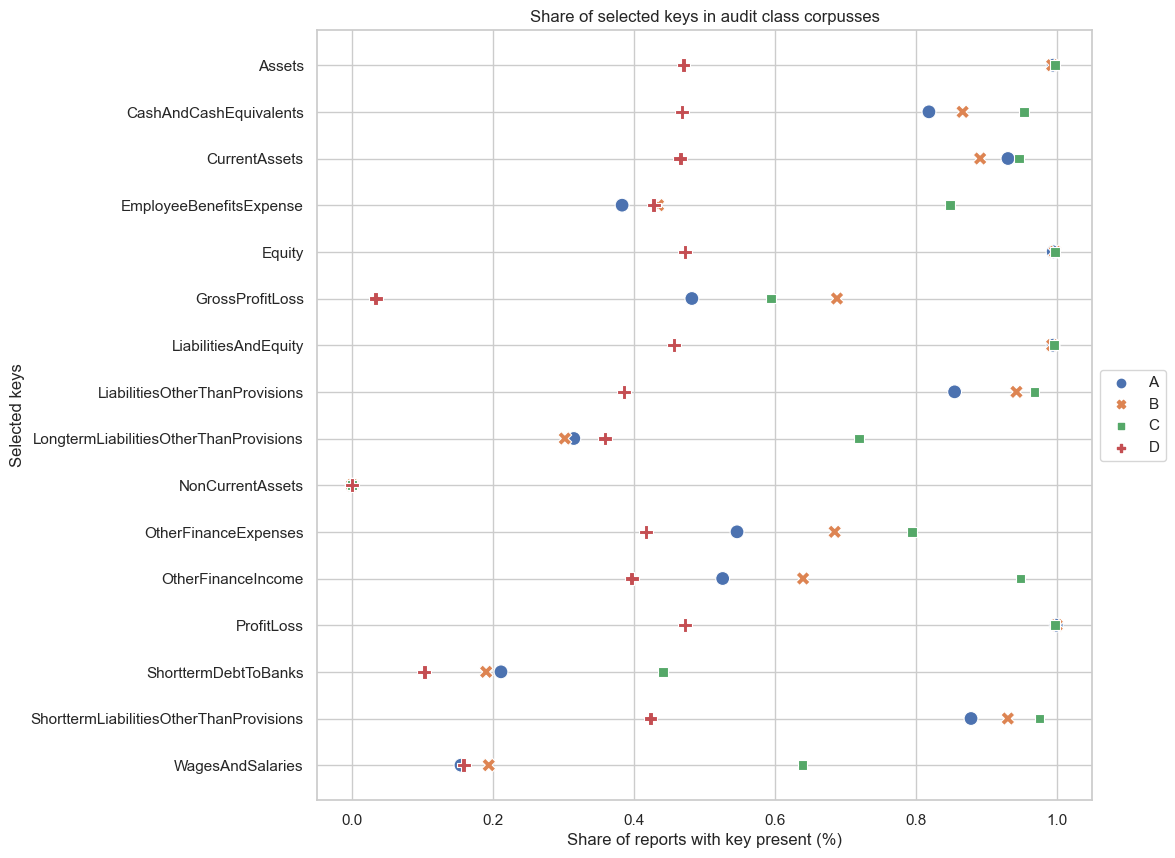

In [7]:
#create a list of shares for each audit class
share_A = shares.loc['A'].values
share_B = shares.loc['B'].values
share_C = shares.loc['C'].values
share_D = shares.loc['D'].values

#plot the share value of the selected keys in each of the audit class corpusses as a combined scatter plot
#the y-axis is the selected keys, the x-axis is the share count of the selected key in the audit class corpus
#the hue is the audit class
#make the shapes of the points different for each audit class
#place legend outside of the plot

df_plot = pd.DataFrame({'key': selected_keys*4, 'share': np.concatenate([share_A, share_B, share_C, share_D]), 
                        'audit_class': ['A']*len(selected_keys) + ['B']*len(selected_keys) + ['C']*len(selected_keys) + ['D']*len(selected_keys)})
df_plot['audit_class'] = df_plot['audit_class'].astype('category')
df_plot['key'] = df_plot['key'].astype('category')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_plot, x='share', y='key', hue='audit_class', style='audit_class', s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Share of reports with key present (%)')
plt.ylabel('Selected keys')
plt.title('Share of selected keys in audit class corpusses')
plt.show()

## Bar Chart of Audit Class Distribution

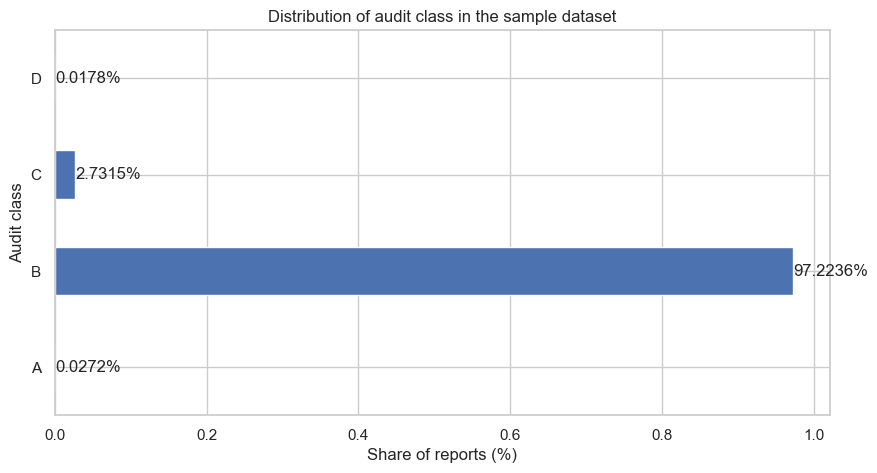

In [30]:
#plot distribution of audit class in the dataset in procent with labels on top of bars
#plot it as a horizontal bar plot

plt.figure(figsize=(10, 5))
df['audit_class'].value_counts(normalize=True).sort_index().plot(kind='barh')
plt.xlabel('Share of reports (%)')
plt.ylabel('Audit class')
plt.title('Distribution of audit class in the sample dataset')
for i, v in enumerate(df['audit_class'].value_counts(normalize=True).sort_index()):
    plt.text(v, i, f'{v:.4%}', va='center')
plt.show()

## Plot of Distribution of no. reports

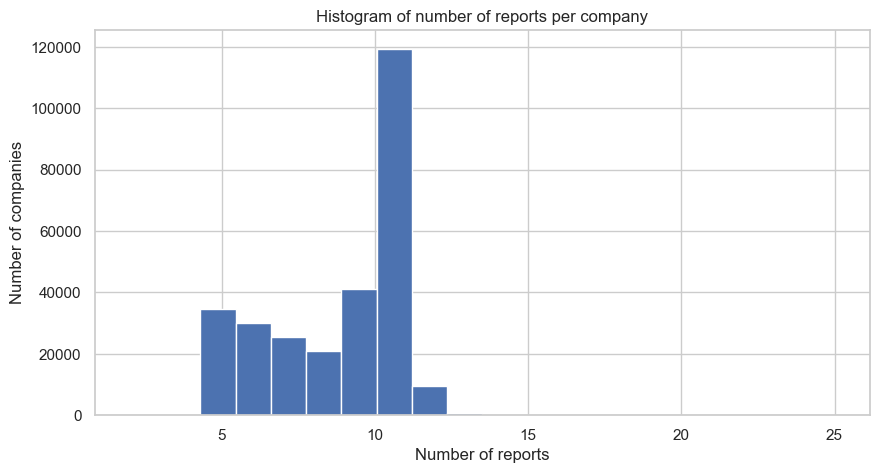

In [31]:
#plot histogram of number of reports per company
#plot it as a histogram with 50 bins

plt.figure(figsize=(10, 5))
df['CVR'].value_counts().plot(kind='hist', bins=20)
plt.xlabel('Number of reports')
plt.ylabel('Number of companies')
plt.title('Histogram of number of reports per company')
plt.show()

## Plot Distribution of keys

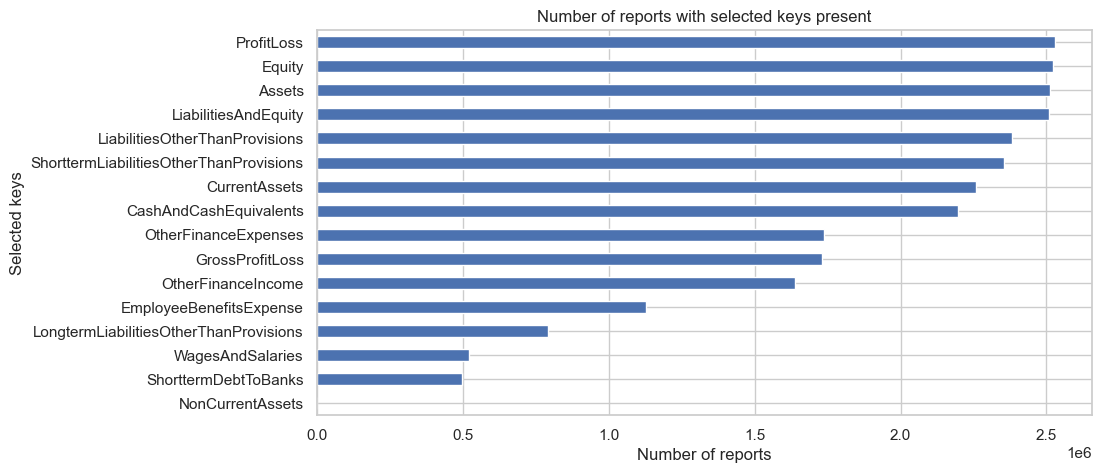

In [32]:
#plot histogram of keys and their occurences in the dataset
# selected keys on y-axis and their occurences on x-axis
#plot it as a horizontal bar plot

plt.figure(figsize=(10, 5))
df[selected_keys].notnull().sum().sort_values().plot(kind='barh')
plt.xlabel('Number of reports')
plt.ylabel('Selected keys')
plt.title('Number of reports with selected keys present')
plt.show()

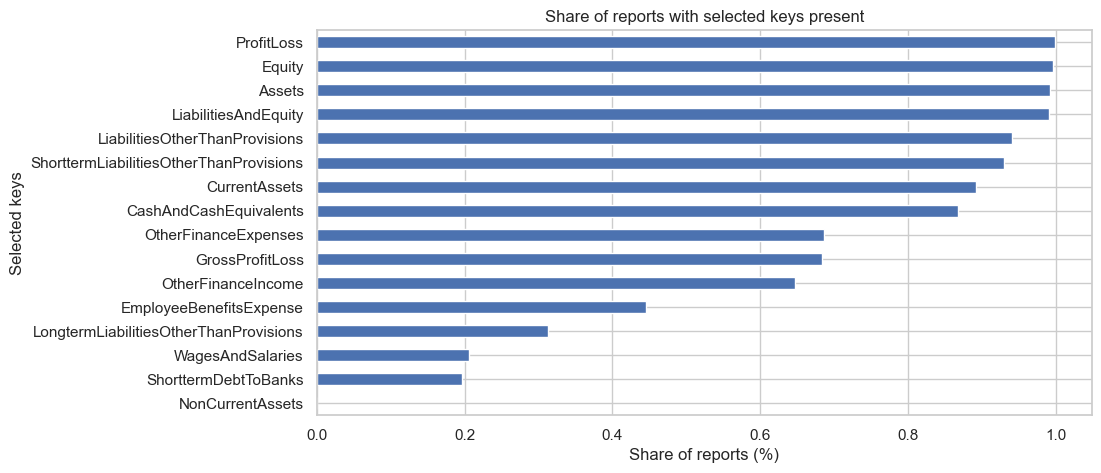

In [33]:
#create the same plot but with their share of occurences in the dataset as the labels on top of the bars

plt.figure(figsize=(10, 5))
df[selected_keys].notnull().mean().sort_values().plot(kind='barh')
plt.xlabel('Share of reports (%)')
plt.ylabel('Selected keys')
plt.title('Share of reports with selected keys present')
# #
plt.show()

In [35]:
selected_keys[3]

'ProfitLoss'

In [36]:
df

,CVR,PublicationDate,AuditClass,ReportType,Currency,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,...,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity,audit_class
0,36458844.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,0.0,NaN,NaN,25643.0,NaN,...,29461.0,255.0,482688.0,169953.0,312735.0,NaN,NaN,312735.0,482688.0,B
1,39300761.0,2021-06-30,Regnskabsklasse B,Årsrapport,DKK,708949.0,602280.0,NaN,82637.0,NaN,...,261672.0,166144.0,267672.0,178157.0,89515.0,NaN,NaN,89515.0,267672.0,B
2,35875220.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,NaN,870546.0,NaN,-168457.0,4688.0,...,1758664.0,274296.0,1790663.0,232359.0,490362.0,750850.0,NaN,1241212.0,1790663.0,B
3,36969989.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,246137.0,180966.0,NaN,39621.0,NaN,...,223128.0,223128.0,262608.0,-198144.0,460752.0,NaN,NaN,460752.0,262608.0,B
4,36419954.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,-62314.0,0.0,NaN,-62988.0,NaN,...,28299.0,4987.0,28299.0,-1144788.0,1173087.0,NaN,NaN,1173087.0,28299.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,24258033.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,413167.0,NaN,NaN,409612.0,NaN,...,6697.0,NaN,6697.0,1524.0,5173.0,NaN,NaN,5173.0,6697.0,B
9995,36501502.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,705463.0,548012.0,481956.0,65931.0,16151.0,...,214414.0,186226.0,1628520.0,418335.0,397352.0,811230.0,186110.0,1208582.0,1628520.0,B
9996,78933917.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,1716964.0,1771137.0,1594757.0,-206266.0,5617.0,...,NaN,66974.0,7163766.0,2161433.0,4989808.0,NaN,727415.0,4989808.0,7163766.0,B
9997,37379964.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,2316321.0,NaN,...,368519.0,2137.0,18894173.0,18736368.0,157805.0,NaN,NaN,157805.0,18894173.0,B


In [56]:
#print datatype for all the selected keys
for key in selected_keys:
    print(key, df[key].dtype)

GrossProfitLoss float64
EmployeeBenefitsExpense float64
WagesAndSalaries float64
ProfitLoss float64
OtherFinanceIncome float64
OtherFinanceExpenses float64
NonCurrentAssets float64
CurrentAssets float64
CashAndCashEquivalents float64
Assets float64
Equity float64
ShorttermLiabilitiesOtherThanProvisions float64
LongtermLiabilitiesOtherThanProvisions float64
ShorttermDebtToBanks float64
LiabilitiesOtherThanProvisions float64
LiabilitiesAndEquity float64


In [55]:
#figure out why profitloss is not a float
df['ProfitLoss'].value_counts()


#convert ProfitLoss to float
df['ProfitLoss'] = df['ProfitLoss'].astype(float)

## Histogram of Key values

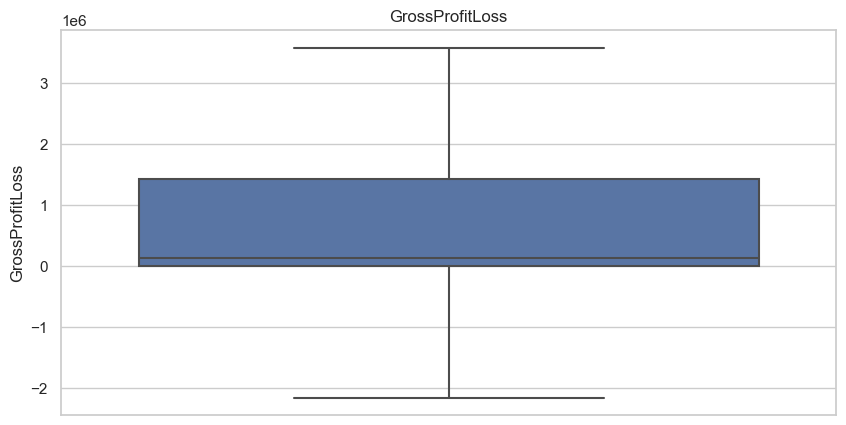

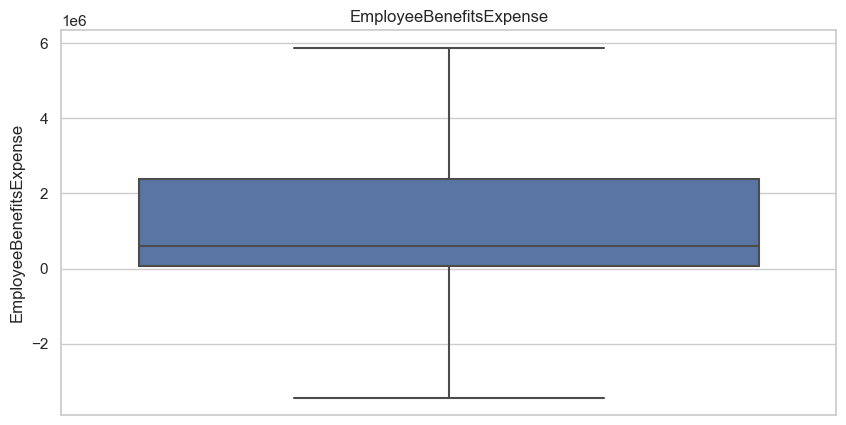

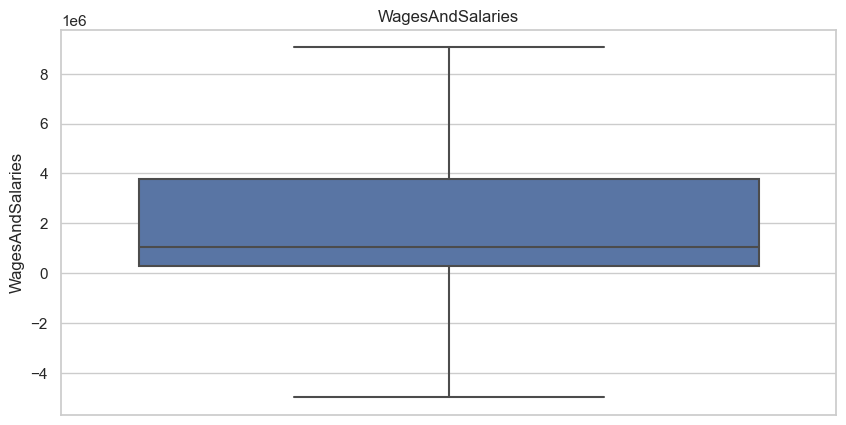

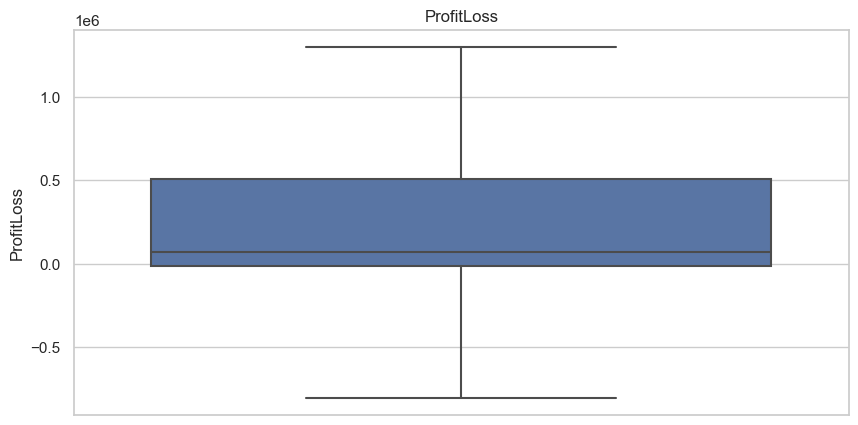

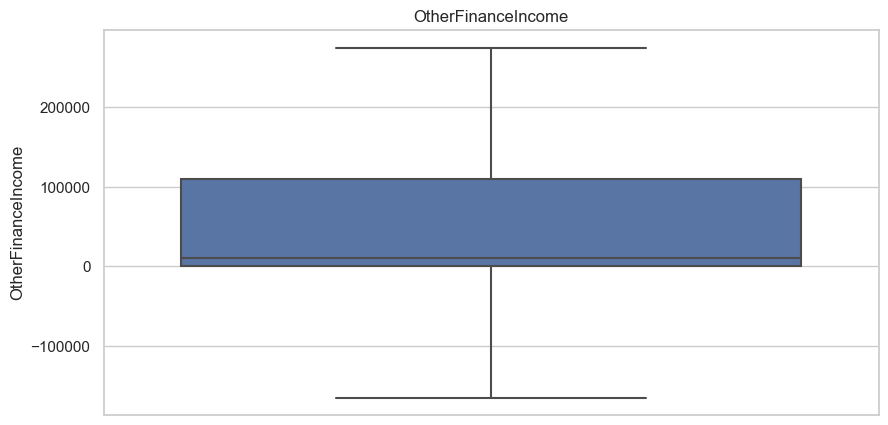

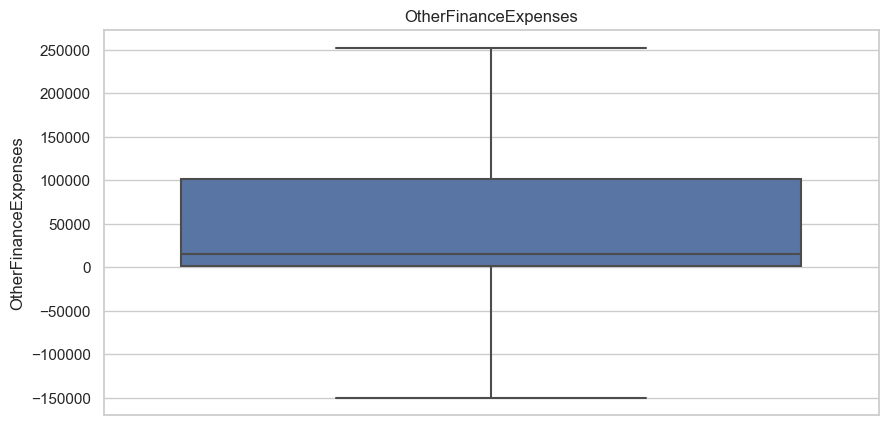

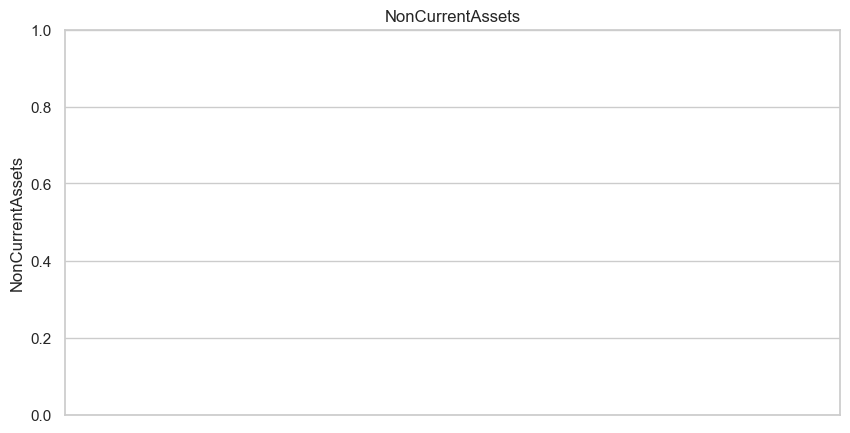

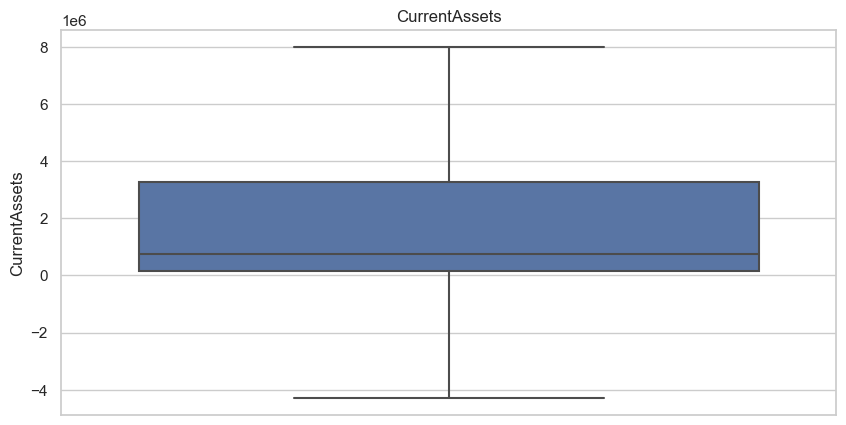

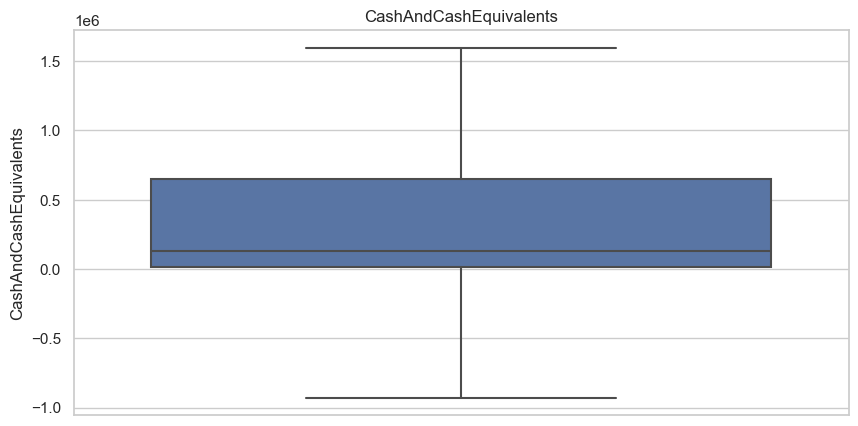

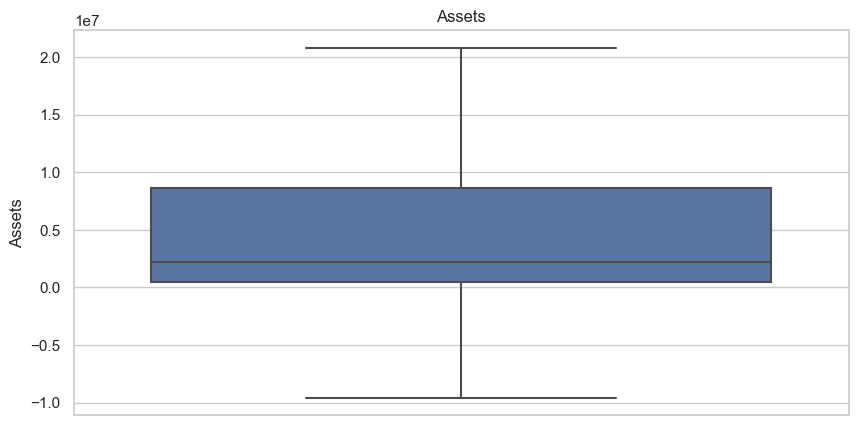

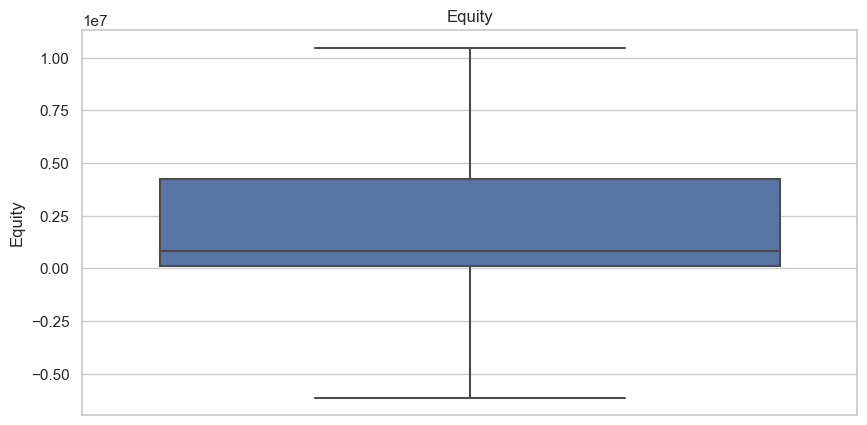

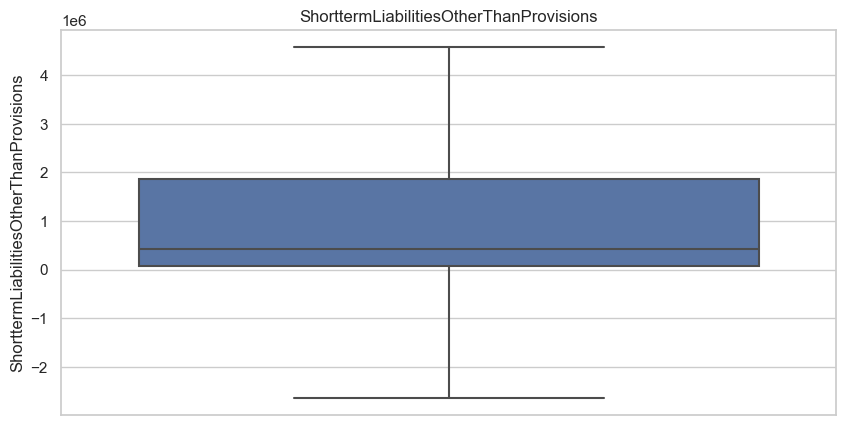

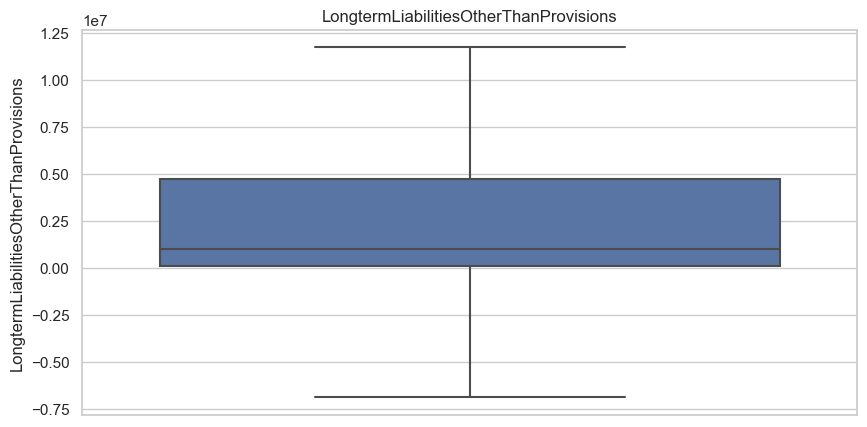

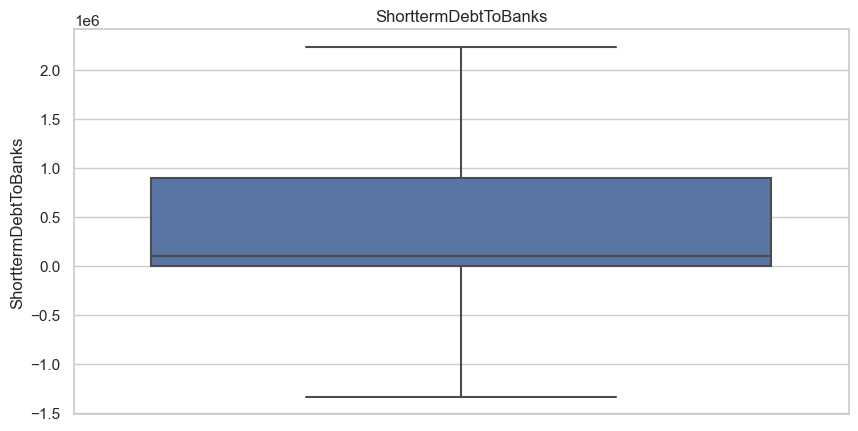

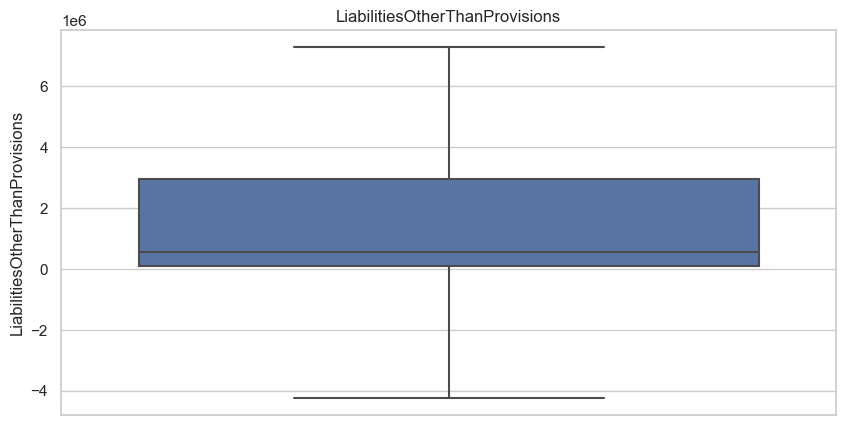

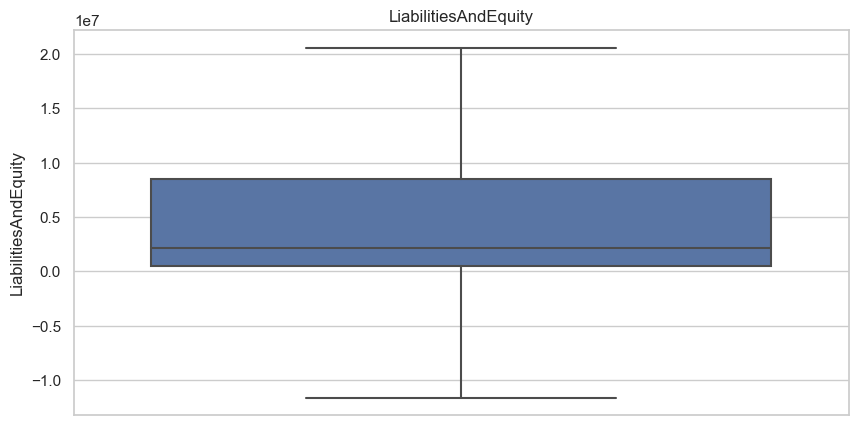

In [57]:
#plot the distribution of each of the selected keys in the dataset as a boxplot

for i in range(len(selected_keys)):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=selected_keys[i],showfliers=False)
    plt.ylabel(selected_keys[i])
    plt.title(f'{selected_keys[i]}')
    plt.show()


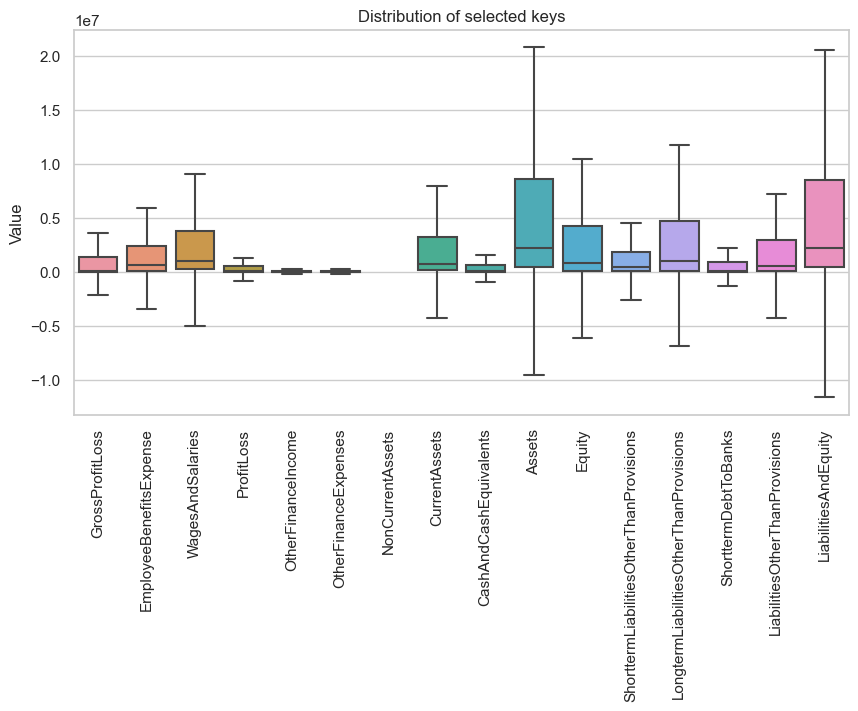

In [58]:
#plot the distribution of each of the selected keys in the dataset as a boxplot
#in one plot

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_keys], showfliers=False)
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title('Distribution of selected keys')
plt.show()

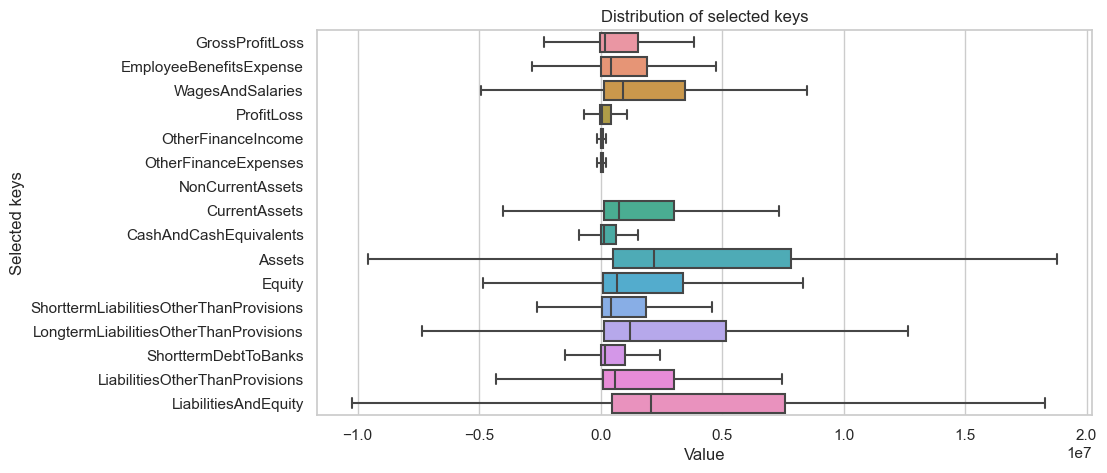

In [ ]:
#flip it so keys are on y-axis and values on x-axis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_keys].melt(), x='value', y='variable', showfliers=False)
plt.xlabel('Value')
plt.ylabel('Selected keys')
plt.title('Distribution of selected keys')
plt.show()

## Profit vs. No. employees

In [ ]:
#load employee count number data

folder = r'/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/Tables/EmployeeCounts'
files = os.listdir(folder)
dfs_em = []
for file in files:
    path = folder + '/' + file
    df_em = pd.read_csv(path, index_col=0)
    dfs_em.append(df_em)

#concatenate all dataframes
df_em = pd.concat(dfs_em, axis=0)

In [ ]:
df_em

,CVR,FromDate,ChangeType,EmployeeCounts
0,34580413,2015-04-01,EmployeeCount,1
1,34580413,2015-05-01,EmployeeCount,1
2,34580413,2015-06-01,EmployeeCount,1
3,34580413,2015-07-01,EmployeeCount,1
4,34580413,2015-08-01,EmployeeCount,1
...,...,...,...,...
310638,38680226,2021-08-01,EmployeeCount,10
310639,38680226,2021-09-01,EmployeeCount,8
310640,38680226,2021-10-01,EmployeeCount,7
310641,38680226,2017-04-01,EmployeeCount,1


In [ ]:
#group by CVR, year and take max of employee count
df_em['Year'] = df_em['FromDate'].str.extract(r'(\d{4})')

df_em_group  = df_em.groupby(['CVR', 'Year'])['EmployeeCounts'].max().reset_index()

In [ ]:
df_em_group

,CVR,FromDate,ChangeType,EmployeeCounts,Year
0,34580413,2015-04-01,EmployeeCount,1,2015
1,34580413,2015-05-01,EmployeeCount,1,2015
2,34580413,2015-06-01,EmployeeCount,1,2015
3,34580413,2015-07-01,EmployeeCount,1,2015
4,34580413,2015-08-01,EmployeeCount,1,2015
...,...,...,...,...,...
310638,38680226,2021-08-01,EmployeeCount,10,2021
310639,38680226,2021-09-01,EmployeeCount,8,2021
310640,38680226,2021-10-01,EmployeeCount,7,2021
310641,38680226,2017-04-01,EmployeeCount,1,2017


In [ ]:
#transform cvr into int64
df['CVR'] = df['CVR'].astype('int64')
df

,CVR,PublicationDate,AuditClass,ReportType,Currency,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,...,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity,audit_class
0,41624310,2013-12-16,Regnskabsklasse B,Årsrapport,DKK,NaN,1361.0,NaN,618673.0,115949.0,...,581640.0,17682.0,581640.0,-839012.0,1420652.0,NaN,NaN,1420652.0,581640.0,B
1,10287979,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,2993428.0,2619814.0,NaN,80576.0,54239.0,...,3698449.0,1133093.0,4590388.0,3218880.0,1079605.0,212398.0,NaN,1292003.0,4590388.0,B
2,25976436,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-43640.0,NaN,NaN,3023764.0,204206.0,...,7287042.0,2954284.0,14457851.0,14418040.0,36204.0,NaN,NaN,36204.0,14457851.0,B
3,25982908,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,126883.0,14210.0,...,517064.0,166587.0,1242686.0,1239561.0,3125.0,NaN,NaN,3125.0,1242686.0,B
4,21330507,2013-12-17,Regnskabsklasse B,Årsrapport,DKK,-10325.0,NaN,NaN,70884.0,120980.0,...,328023.0,153500.0,1596309.0,1144293.0,452016.0,NaN,NaN,452016.0,1596309.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15122943,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,521981.0,NaN,43541.0,2612.0,...,121567.0,120463.0,388767.0,274950.0,103617.0,10200.0,NaN,113817.0,388767.0,B
9994,27917836,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,588000.0,NaN,NaN,1221000.0,590000.0,...,5843000.0,1303000.0,7657000.0,6394000.0,1213000.0,NaN,NaN,1213000.0,7657000.0,B
9995,28332009,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,2375753.0,22796.0,...,1965299.0,14921.0,27941284.0,10011785.0,3033511.0,14454988.0,NaN,17488499.0,27941284.0,B
9996,19376613,2014-11-20,Regnskabsklasse B,Årsrapport,DKK,NaN,-410490.0,-399152.0,-780950.0,85931.0,...,731554.0,NaN,61461031.0,18563013.0,15046197.0,22543666.0,7167820.0,37589863.0,61461031.0,B


In [ ]:
#find min publication date in df
df['PublicationDate'] = pd.to_datetime(df['PublicationDate'])
min_pub_date = df['PublicationDate'].min()

In [ ]:
min_pub_date

Timestamp('2013-01-01 00:00:00')